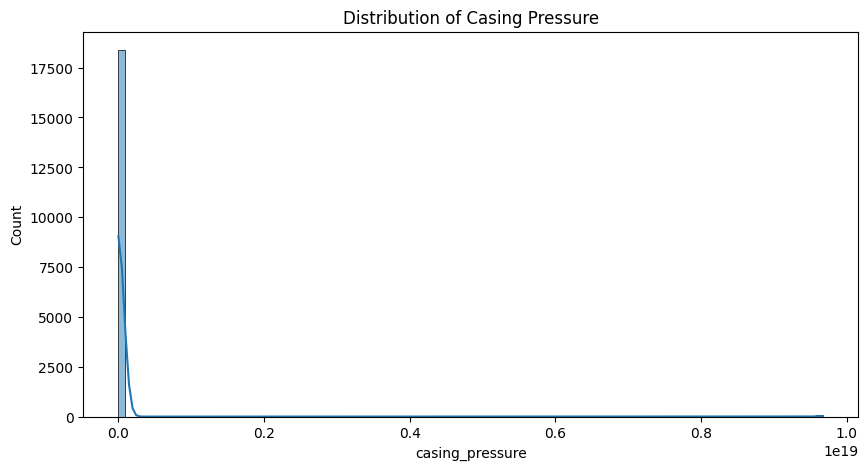

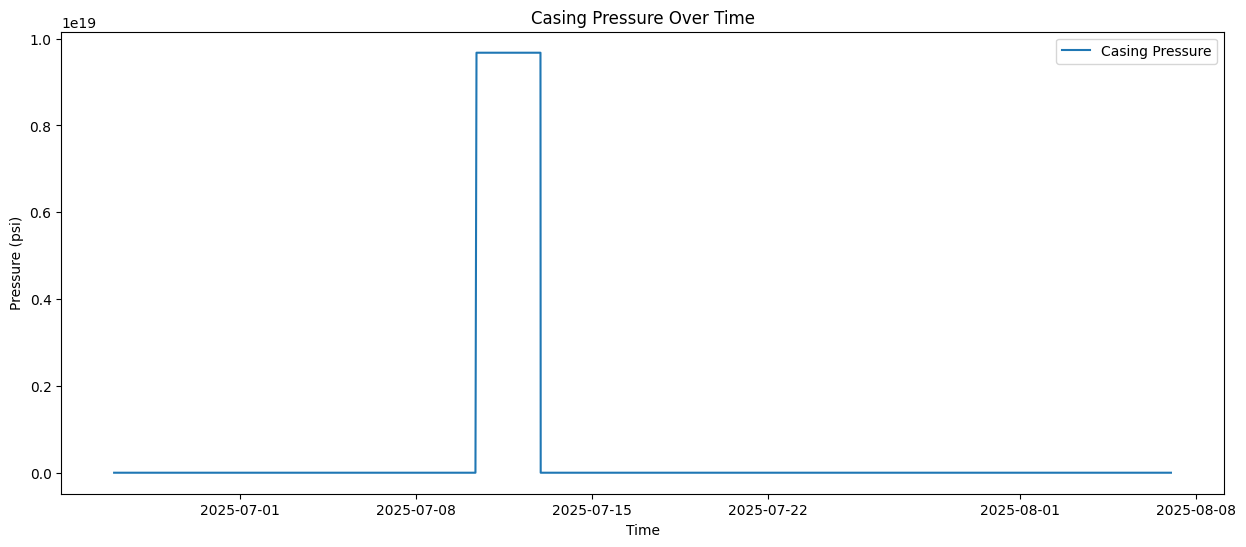

<function matplotlib.pyplot.scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, *, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, colorizer: 'Colorizer | None' = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'>

<Figure size 1500x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def rule_based_detection(series, max_pressure=5000, min_pressure=1, jump_threshold=200):
    rules = pd.DataFrame(index=series.index)
    rules["gross_outlier"] = (series > max_pressure) | (series < min_pressure)
    rules["suden_jump"] = series.diff().abs() > jump_threshold
    rules["zero_drop"] = (series == 0) & (series.shift() > 50)
    rules["is_anomaly"] = rules.any(axis=1)
    return rules

rules = rule_based_detection(df["casing_pressure"])

# Compare with labeled anomalies
df["rule_anomaly"] = rules["is_anomaly"]

# Distribution of casing pressure
plt.figure(figsize=(10,5))
sns.histplot(df["casing_pressure"], bins=100, kde=True)
plt.title("Distribution of Casing Pressure")
plt.show()


#Time series plot 
plt.figure(figsize=(15,6))
plt.plot(df.index, df["casing_pressure"], label="Casing Pressure")
plt.title("Casing Pressure Over Time")
plt.xlabel("Time")
plt.ylabel("Pressure (psi)")
plt.legend()
plt.show()

# Overlay Anomalies
plt.figure(figsize=(15,6))
plt.plot(df.index, df["casing_pressure"], label="Normal")
plt.scatter(df[df["ANOMALY"]==1].index, df[df["ANOMALY"]==1]["casing_pressure"], color="red", label="Anomaly")


Detected anomalies: 125
Labeled anomalies: 132


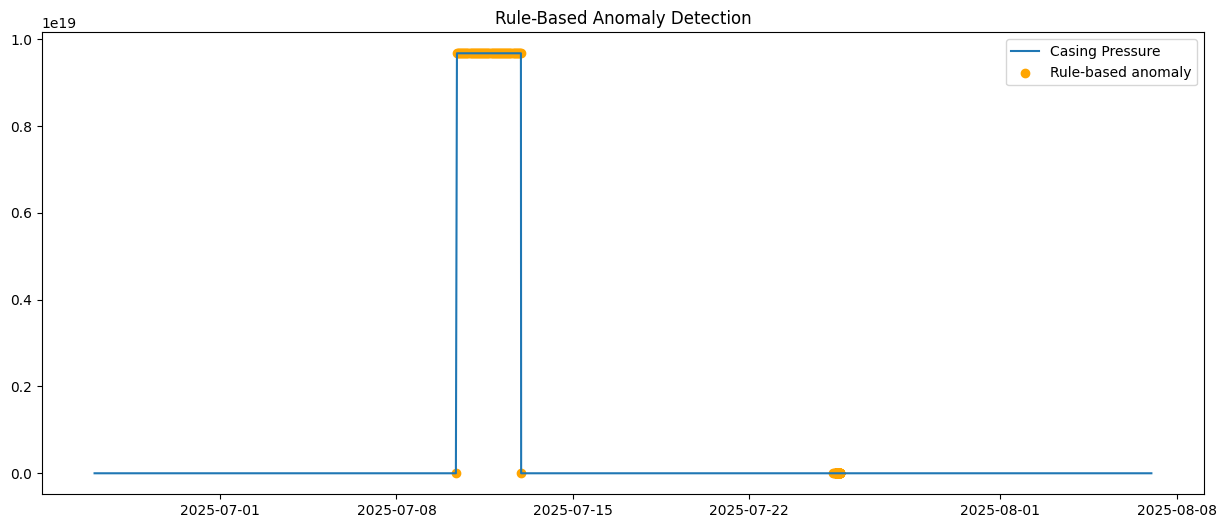

In [ ]:
import numpy as np

def rule_based_anomaly_detection(series, max_pressure=5000, min_pressure=1, jump_threshold=200):
    rules = pd.DataFrame(index=series.index)
    rules["gross_outlier"] = (series > max_pressure) | (series < min_pressure)
    rules["sudden_jump"] = series.diff().abs() > jump_threshold
    rules["zero_drop"] = (series == 0) & (series.shift() > 50)
    #outside 2 SD
    rules["is_anomaly"] = rules.any(axis=1)
    return rules

rules = rule_based_anomaly_detection(df["casing_pressure"])

# Compare with labeled anomalies
df["rule_anomaly"] = rules["is_anomaly"]

# Metrics
print("Detected anomalies:", df["rule_anomaly"].sum())
print("Labeled anomalies:", df["ANOMALY"].sum())

# Plot detected anomalies
plt.figure(figsize=(15,6))
plt.plot(df.index, df["casing_pressure"], label="Casing Pressure")
plt.scatter(df[df["rule_anomaly"]==True].index,
            df[df["rule_anomaly"]==True]["casing_pressure"],
            color="orange", label="Rule-based anomaly")
plt.legend()
plt.title("Rule-Based Anomaly Detection")
plt.show()


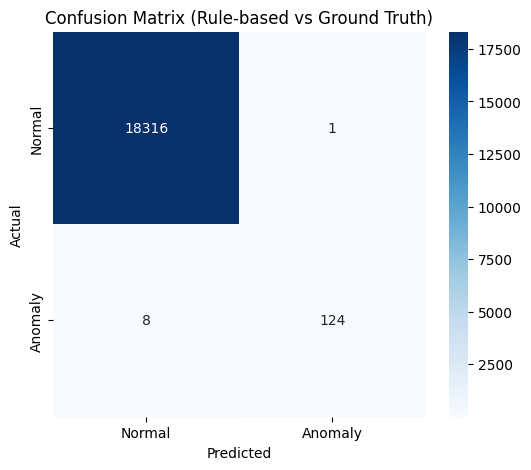

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     18317
     Anomaly       0.99      0.94      0.96       132

    accuracy                           1.00     18449
   macro avg       1.00      0.97      0.98     18449
weighted avg       1.00      1.00      1.00     18449



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ground truth vs predicted
y_true = df["ANOMALY"]
y_pred = df["rule_anomaly"].astype(int)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ["Normal", "Anomaly"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Rule-based vs Ground Truth)")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


In [ ]:
import pandas as pd

#load ds
df = pd.read_csv("dataset/Casing_pressure-anomaly-csv.csv")

df = df.rename(columns={
    "t_stamp": "timestamp",
    "Well Pads/Pronghorn KO/12HNB/Well Head/Well Casing Pressure/Value" : "casing_pressure"
})

# convert timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"])

 

# Print Info
print("Info: ", df.info())
print("=====\n\n\n")
print("Head: ")
print(df.head())
print("=====\n\n\n")
print(df["ANOMALY"].value_counts())

C:\Users\Admin\AppData\Local\Temp\ipykernel_17912\460288816.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["timestamp"] = pd.to_datetime(df["timestamp"])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18449 entries, 2025-06-26 00:01:00 to 2025-08-07 00:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   casing_pressure  18449 non-null  float64
 1   ANOMALY          18449 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 432.4 KB
Info:  None
=====



Head: 
                     casing_pressure  ANOMALY
timestamp                                    
2025-06-26 00:01:00       192.765594        0
2025-06-26 00:06:00       192.612946        0
2025-06-26 00:07:00       192.765594        0
2025-06-26 00:09:00       192.612946        0
2025-06-26 00:11:00       192.765594        0
=====



ANOMALY
0    18317
1      132
Name: count, dtype: int64
